# 1. Исследовательский анализ набора фотографий.

In [3]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [5]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Посмотрим на распределение данных по возростам:

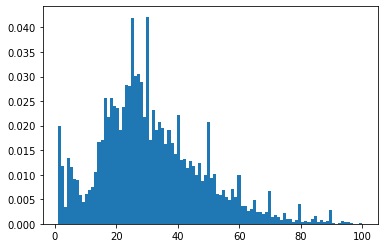

In [7]:
plt.hist(labels['real_age'], density=True, bins=100)
pass

По графику видны 2 вершины. Возможно подмешана еще одна выборка. Мало пожилых людей, это повлияет на качество обучения негативно. Присутсвует много младенцев, возможно это выброс.

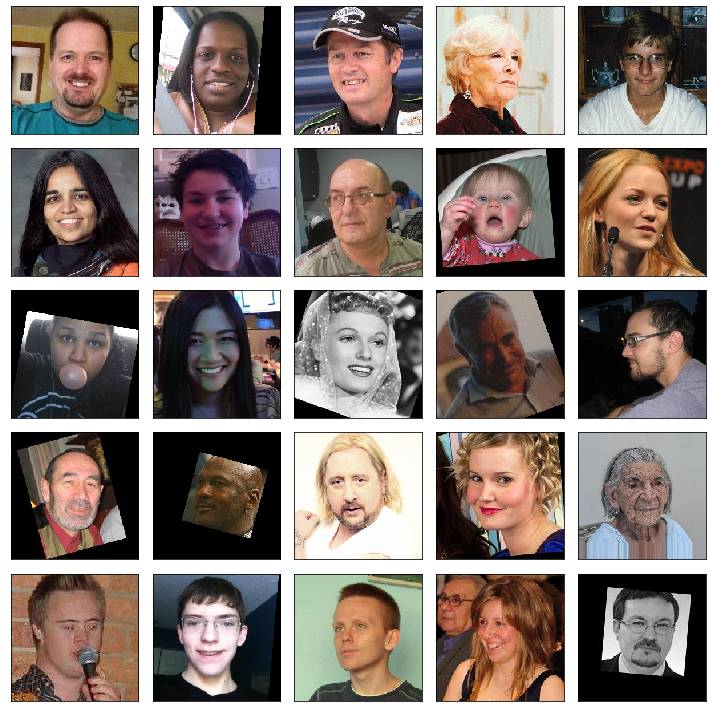

In [3]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(25):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

# 2. Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
 
    return train_gen_flow


def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
 
    return test_gen_flow


def create_model(input_shape):
    backbone = ResNet50(weights='imagenet',
                        input_shape=input_shape,
                        include_top=False)
 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
 
    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
 
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model

```

```

WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/20

356/356 - 106s - loss: 204.3862 - mae: 10.7978 - val_loss: 383.4903 - val_mae: 14.6498
Epoch 2/20
356/356 - 43s - loss: 136.3871 - mae: 8.9662 - val_loss: 243.6406 - val_mae: 11.7039
Epoch 3/20
356/356 - 43s - loss: 115.6455 - mae: 8.2297 - val_loss: 112.5691 - val_mae: 8.3433
Epoch 4/20
356/356 - 43s - loss: 95.9091 - mae: 7.4210 - val_loss: 105.9387 - val_mae: 7.8462
Epoch 5/20
356/356 - 43s - loss: 81.8817 - mae: 6.8763 - val_loss: 101.3855 - val_mae: 7.6827
Epoch 6/20
356/356 - 44s - loss: 73.0803 - mae: 6.5243 - val_loss: 112.7333 - val_mae: 8.1864
Epoch 7/20
356/356 - 43s - loss: 59.4854 - mae: 5.9315 - val_loss: 100.2494 - val_mae: 7.5820
Epoch 8/20
356/356 - 44s - loss: 47.2887 - mae: 5.2750 - val_loss: 157.4319 - val_mae: 8.9517
Epoch 9/20
356/356 - 43s - loss: 45.5629 - mae: 5.2087 - val_loss: 96.2258 - val_mae: 7.4578
Epoch 10/20
356/356 - 43s - loss: 35.0725 - mae: 4.5623 - val_loss: 89.7504 - val_mae: 7.1333
Epoch 11/20
356/356 - 44s - loss: 32.5540 - mae: 4.3894 - val_loss: 89.5744 - val_mae: 7.1192
Epoch 12/20
356/356 - 45s - loss: 33.5705 - mae: 4.4837 - val_loss: 89.5363 - val_mae: 7.1154
Epoch 13/20
356/356 - 47s - loss: 26.3260 - mae: 3.9502 - val_loss: 89.6239 - val_mae: 7.4079
Epoch 14/20
356/356 - 46s - loss: 21.6727 - mae: 3.5754 - val_loss: 90.0597 - val_mae: 7.2231
Epoch 15/20
356/356 - 47s - loss: 21.0230 - mae: 3.5200 - val_loss: 90.4997 - val_mae: 7.1428
Epoch 16/20
356/356 - 47s - loss: 22.1367 - mae: 3.6360 - val_loss: 96.2128 - val_mae: 7.7078
Epoch 17/20
356/356 - 46s - loss: 18.8678 - mae: 3.3411 - val_loss: 92.5305 - val_mae: 7.1015
Epoch 18/20
356/356 - 46s - loss: 17.4527 - mae: 3.2250 - val_loss: 93.5824 - val_mae: 7.2418
Epoch 19/20
356/356 - 46s - loss: 17.4739 - mae: 3.2146 - val_loss: 93.7204 - val_mae: 7.4657
Epoch 20/20
356/356 - 47s - loss: 17.3855 - mae: 3.2017 - val_loss: 105.3202 - val_mae: 7.6793
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 12s - loss: 105.3202 - mae: 7.6793
Test MAE: 7.6793

```

# 3. Анализ обученной модели

Учитывается только последний результат val_mae, хотя он может менятся от эпохи к эпохе. С 1-ой по 5-ую эпоху результат улучшался до 7.7, на 6-ой ухудшился до 8.2, затем 7.6 и снова ухудшился до почти 9. Возможно, следует принимать во внимание какой-либо усреднённый результат, хотябы на энном количестве последних эпох для объективности, т.к. при следующей загрузке модели на проверку, на последней эпохе, мог свободно произойти скачёк за 8 и модель бы провалилась.  

В итоге, модель удовлетворяет поставленным задачам и не выходит за рамки(среднее абсолютное отклонение на вылидационной выборке = 8).  

Как результыты исследования повлияют на обучение модели:  

Чем больше выборка - тем точне будет предсказывать модель. Если в выборке преобладают фотографии какого-либо возраста, модель будет лучше предсказывать именно этот возраст. В данной выборке уже приближены области лиц от фотографий. Размер 224х224 - оригинальный размер ResNet50, поэтому в теории, он должен положительно влияеть на результаты. В датасете есть старые и черно-белые фотографии. Имеет смысл делать аугментацию с тем, чтобы делать фотографию черно-белой в некотором проценте случаев (нету в стандартном наборе). Возможно, стоит подкрутить цветовые каналы или яркость. Присутсвуют фотогарафи, на которых лица изображены под разными углами к вертикальной оси. Имеет смысл делать аугментацию с rotation_range равным +-15-20 градусов в некотором проценте случаев. Поворачивать можно как само изображение так и объект отдельно от фона. Есть фотогарафи, на которых лица изображены в полупрофиль. Имеет смысл делать аугментацию с отражением по горизонтали в некотором проценте случаев. Есть фотогарафи с разным разрешением. Имеет смысл делать аугментацию с изменением контрастности изображения в некотором проценте случаев. В датасете есть фотогарафи, на которых изображены не лица, а голова и часть туловища (иногда человек послностью). Имеет смысл делать аугментацию с обезкой и масштабированием изображения в некотором проценте случаев, чтобы на фото были только лица примерно одного масштаба.